In [2]:
from pandas import *
dir='/home/augusto/Descargas/data kaggle/'

In [3]:
MC=read_csv(dir+'marvel_reviews.csv')
M0=read_csv('marvel_limpio.csv')

In [7]:
MC=MC.dropna()

In [10]:
MC=MC.reset_index().drop('index',axis=1)

In [12]:
len(MC)

62

In [13]:
len(M0)

63

In [23]:
MC['RT']=MC['Rotten Tomatoes'].apply(lambda x: Series(str(x).split('%')))[0].astype('int')

In [29]:
MC['Mc']=MC['Metacritic'].apply(lambda x: Series(str(x).split()))[0].astype('int')

In [26]:
MC.keys()

Index(['Film', 'Rotten Tomatoes', 'Metacritic', 'CinemaScore', 'RT'], dtype='object')

In [36]:
MC['CS']=MC['CinemaScore'].apply(lambda x: Series(str(x).split('[')))[0]#.astype('int')

In [41]:
MC=MC.rename(columns={'Film':'Title'})


In [109]:
M1=MC.filter(['Title','RT','Mc','CS'])

In [83]:
M0.Title.values==M1.Title.values.all()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [84]:
M0.Title.apply(lambda x: x in M1.Title.values)

0     True
1     True
2     True
3     True
4     True
      ... 
58    True
59    True
60    True
61    True
62    True
Name: Title, Length: 63, dtype: bool

In [85]:
m=M0.Title.apply(lambda x: x in M1.Title.values)

In [86]:
m.loc[m==False]

8     False
12    False
38    False
57    False
Name: Title, dtype: bool

In [88]:
M0.loc[[8,12,38,57]]

,Title,Dist,budget,relDate,year,month,day,Recaudado,ganancia
8,The Punisher,Lionsgate Films,33,2004-04-16,2004,4,16,54.70,21.70
12,Fantastic Four,20th Century Fox,100,2005-07-08,2005,7,8,330.58,230.58
38,Fantastic Four,20th Century Fox,120,2015-08-07,2015,8,7,167.88,47.88
57,The New Mutants,20th Century Studios,67,2020-08-28,2020,8,28,48.68,-18.32


In [110]:
M1.loc[[8,12,38,57]].Title.apply(lambda x: Series(str(x).split('(')))[0]

8       The Punisher 
12    Fantastic Four 
38    Fantastic Four 
57        Black Widow
Name: 0, dtype: object

In [111]:
M1['Title']=M1.Title.apply(lambda x: Series(str(x).split(' (')))[0]

In [112]:
m=M0.Title.apply(lambda x: x in M1.Title.values)

In [113]:
m.loc[m==False]

57    False
Name: Title, dtype: bool

In [115]:
M0.join(M1,rsuffix='r')

,Title,Dist,budget,relDate,year,month,day,Recaudado,ganancia,Titler,RT,Mc,CS
0,Howard the Duck,Universal Pictures,37,1986-08-01,1986,8,1,37.96,0.96,Howard the Duck,14.0,28.0,B-
1,Blade,New Line Cinema,45,1998-08-21,1998,8,21,131.18,86.18,Blade,57.0,47.0,A-
2,X-Men,20th Century Fox,75,2000-07-14,2000,7,14,296.34,221.34,X-Men,82.0,64.0,A-
3,Blade II,New Line Cinema,54,2002-03-22,2002,3,22,155.01,101.01,Blade II,57.0,52.0,B+
4,Spider-Man,Sony Pictures,139,2002-05-03,2002,5,3,821.71,682.71,Spider-Man,90.0,73.0,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Black Widow,Walt Disney Studios Motion Pictures,200,2021-07-09,2021,7,9,379.63,179.63,Shang-Chi and the Legend of the Ten Rings,91.0,71.0,A
59,Shang-Chi and the Legend of the Ten Rings,Walt Disney Studios Motion Pictures,150,2021-09-03,2021,9,3,432.24,282.24,Venom: Let There Be Carnage,58.0,49.0,B+
60,Venom: Let There Be Carnage,Sony Pictures,110,2021-10-01,2021,10,1,502.05,392.05,Eternals,47.0,52.0,B
61,Eternals,Walt Disney Studios Motion Pictures,200,2021-11-05,2021,11,5,402.06,202.06,Spider-Man: No Way Home,93.0,72.0,A+


In [155]:
Mar1=M0.merge(M1,on='Title')#,validate='one_to_one')

In [151]:
M0.Title.values


array(['Howard the Duck', 'Blade', 'X-Men', 'Blade II', 'Spider-Man',
       'Daredevil', 'X2', 'Hulk', 'The Punisher', 'Spider-Man 2',
       'Blade: Trinity', 'Elektra', 'Fantastic Four',
       'X-Men: The Last Stand', 'Ghost Rider', 'Spider-Man 3',
       'Fantastic Four: Rise of the Silver Surfer', 'Iron Man',
       'The Incredible Hulk', 'Punisher: War Zone',
       'X-Men Origins: Wolverine', 'Iron Man 2', 'Thor',
       'X-Men: First Class', 'Captain America: The First Avenger',
       'Ghost Rider: Spirit of Vengeance', 'The Avengers',
       'The Amazing Spider-Man', 'Iron Man 3', 'The Wolverine',
       'Thor: The Dark World', 'Captain America: The Winter Soldier',
       'The Amazing Spider-Man 2', 'X-Men: Days of Future Past',
       'Guardians of the Galaxy', 'Big Hero 6', 'Avengers: Age of Ultron',
       'Ant-Man', 'Fantastic Four', 'Deadpool',
       'Captain America: Civil War', 'X-Men: Apocalypse',
       'Doctor Strange', 'Logan', 'Guardians of the Galaxy Vol. 2',


In [154]:
Mar2=M0.drop(57,axis=0).reset_index().drop('index',axis=1).join(M1.drop('Title',axis=1))

In [162]:
Mar1.filter(['ganancia','RT']).loc[Mar1['RT']==97]

,ganancia,RT
54,285.54,97


In [163]:
Mar1.loc[54]

Title        Spider-Man: Into the Spider-Verse
Dist                             Sony Pictures
budget                                      90
relDate                             2018-12-14
year                                      2018
month                                       12
day                                         14
Recaudado                               375.54
ganancia                                285.54
RT                                          97
Mc                                          87
CS                                          A+
Name: 54, dtype: object

In [165]:
Mar1.loc[Mar1['ganancia']==Mar1.ganancia.max()]

,Title,Dist,budget,relDate,year,month,day,Recaudado,ganancia,RT,Mc,CS
56,Avengers: Endgame,Walt Disney Studios Motion Pictures,356,2019-04-26,2019,4,26,2797.8,2441.8,94,78,A+


In [167]:
Mar2.loc[Mar2['RT']==Mar2.RT.max()]

,Title,Dist,budget,relDate,year,month,day,Recaudado,ganancia,RT,Mc,CS
52,Spider-Man: Into the Spider-Verse,Sony Pictures,90,2018-12-14,2018,12,14,375.54,285.54,97,87,A+


<AxesSubplot:xlabel='year'>

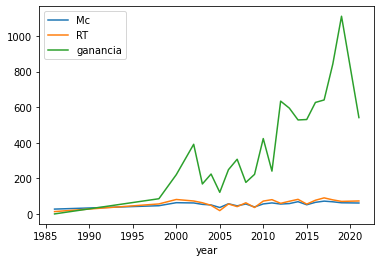

In [187]:
Mar2.filter(['year','ganancia','RT','Mc','CS']).pivot_table(index='year').round(2).plot()

<AxesSubplot:xlabel='year'>

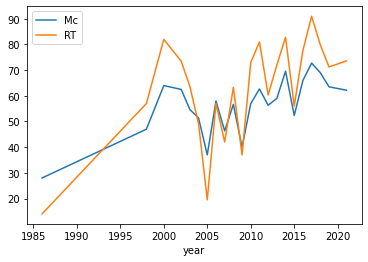

In [188]:
Mar2.filter(['year','RT','Mc','CS']).pivot_table(index='year').round(2).plot()